In [143]:
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from pathlib import Path
import os

import pylab as pl

Datasetpath = Path(os.path.abspath('')) / "olls_1000k.csv"
algopath = Path(os.path.abspath('')).parents[0] / "Cube/new_oll_algos.csv"
print(Datasetpath)
print(algopath)

C:\Users\bliks\Documents\School\Maturaarbeit\NNRubiksCube\Datasets\olls_1000k.csv
C:\Users\bliks\Documents\School\Maturaarbeit\NNRubiksCube\Cube\new_oll_algos.csv


In [144]:
# read data
algos = pd.read_csv(algopath, usecols=("Cube State",), dtype=str).iloc[:, 0].values.tolist()
data = pd.read_csv(filepath_or_buffer=Datasetpath, usecols=("Type",), dtype=str).iloc[:, 0].values.tolist()
# print(algos)
# print(data)
bins = algos
# print(bins)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [145]:
amount = []
for x in bins:
    number = data.count(x)
    amount.append(number)
zipped = list(zip(bins, amount))
mean = statistics.mean(amount)
print(zipped)
print(len(zipped))

[('111010111010', 4544), ('010111010111', 4491), ('111011010110', 4523), ('110111011010', 4562), ('010110111011', 4566), ('011010110111', 4617), ('011010011011', 4554), ('011011010011', 4616), ('011011011010', 4561), ('010011011011', 4659), ('110110110010', 4447), ('010110110110', 4542), ('110010110110', 4564), ('110110010110', 4585), ('011000001011', 4701), ('011011000001', 4640), ('001011011000', 4584), ('000001011011', 4609), ('110110100000', 4660), ('000110110100', 4596), ('100000110110', 4566), ('110100000110', 4615), ('000011011001', 4779), ('001000011011', 4615), ('011001000011', 4721), ('011011001000', 4670), ('000100110110', 4684), ('110000100110', 4537), ('110110000100', 4638), ('100110110000', 4610), ('100110010100', 4666), ('100100110010', 4636), ('010100100110', 4621), ('110010100100', 4616), ('001001010011', 4652), ('011001001010', 4610), ('010011001001', 4629), ('001010011001', 4474), ('010001001011', 4665), ('011010001001', 4513), ('001011010001', 4617), ('001001011010'

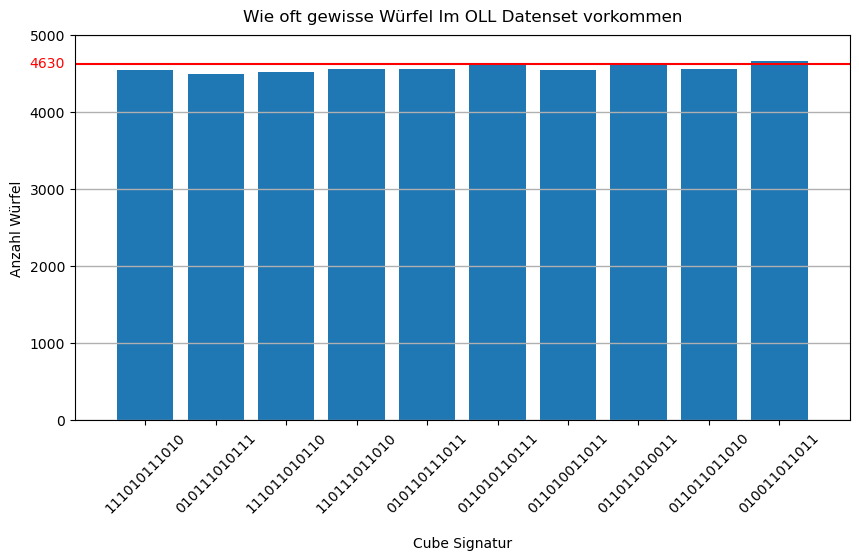

In [164]:
plt.figure(figsize=(10, 5))
plt.subplot()
plt.title("Wie oft gewisse Würfel Im OLL Datenset vorkommen", pad=10)
plt.ylabel("Anzahl Würfel")
plt.xlabel("Cube Signatur", labelpad=15)
plt.grid(True, 'major', 'y', linewidth=1)
plt.xlim(-1, len(bins[:10]))
plt.ylim(0, 5000)
plt.xticks(rotation=45)
plt.axhline(mean, color='r', label="average")
plt.text(-1.14, mean, f"{mean:.0f}", color='r', ha='right', va='center')
plt.bar(bins[:10], amount[:10], align='center')
# plt.show()
plt.savefig("histogram_olls_1000k.svg", bbox_inches="tight")

In [158]:
stdev = statistics.stdev(amount)
perc = stdev / statistics.mean(amount)
print(f"{stdev:.2f}")
print(f"{perc*100:.2f}%")

73.50
1.59%
